# Neural Networks

### Colab Setup

In [25]:
import os

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [26]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS3540/CS3540-Final-Project/'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['ToDos.md', 'LICENSE', 'XGBoost.ipynb', 'RandomForest.ipynb', 'README.md', 'realAccountData.json', 'fakeAccountData.json', 'Unsupervised.ipynb', 'SVM.ipynb', 'LogisticRegression.ipynb', 'DataManip.ipynb', 'NeuralNetwork.ipynb']


In [27]:
import json

with open(f'{GOOGLE_DRIVE_PATH}realAccountData.json', 'r') as f:
            realData = json.load(f)
with open(f'{GOOGLE_DRIVE_PATH}fakeAccountData.json', 'r') as f:
            fakeData = json.load(f)
allData = realData + fakeData

### Setup

In [28]:
# import needed libraries
from __future__ import absolute_import, division, print_function, unicode_literals

# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

# Helper libraries

print(tf.__version__)

2.19.0


In [29]:
#setting a random seed for reproducibility
import random
random.seed(4)
tf.random.set_seed(4)
np.random.seed(4)

random.shuffle(allData)


In [30]:
#turning into numpy arrays
numpy_real = np.array(realData)
# print(numpy_real[1]) #making sure things work
numpy_fake = np.array(fakeData)
# print(numpy_fake[1]) #making sure things work
numpy_all = np.array(allData)
# print(numpy_all[1]) #making sure things work

#and making a dataframe
allData_df = pd.DataFrame(allData)

In [31]:
cols = allData_df.shape[1]
X = allData_df.iloc[:,0:cols-1] # iloc slicing function
Y = allData_df.iloc[:,cols-1:cols]

In [32]:
#train test split being made
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# and standardizing the X data

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=4)  #getting validation set



scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test) #you have to do this
x_val = scaler.transform(x_val) #you have to do this



In [33]:
print (x_train.shape, y_train.shape)
print (x_val.shape, y_val.shape)
print (x_test.shape, y_test.shape)

(716, 8) (716, 1)
(179, 8) (179, 1)
(299, 8) (299, 1)


In [34]:
# defining the stopping parameter for early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)


## Defining the First Neural Network (1 layer)

In [35]:
layers1 = [
    Flatten(),
    #Add your first layer details here, Example Dense(50, activation="tanh"),
    Dense(50, activation = "relu"),
    #Add your second layer details here
    Dense(1, activation = "sigmoid")
]

model1 = Sequential(layers1)

model1.compile(optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, batch_size=16, epochs= 100, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7592 - loss: 0.6664 - val_accuracy: 0.7989 - val_loss: 0.5557
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8667 - loss: 0.4648 - val_accuracy: 0.8268 - val_loss: 0.4199
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9090 - loss: 0.3374 - val_accuracy: 0.8715 - val_loss: 0.3407
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9254 - loss: 0.2592 - val_accuracy: 0.8771 - val_loss: 0.2949
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9400 - loss: 0.2134 - val_accuracy: 0.8771 - val_loss: 0.2675
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9412 - loss: 0.1860 - val_accuracy: 0.8827 - val_loss: 0.2498
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9506 - loss: 0.1685 - val_accuracy: 0.8883 - val_loss: 0.2375
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9544 - loss: 0.1565 - val_accuracy: 0.8939 - 

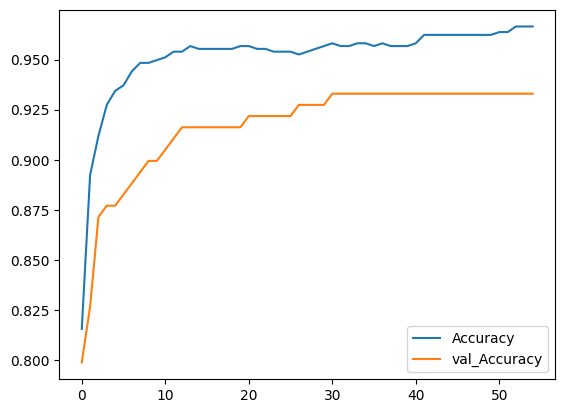

In [36]:
plt.plot(history1.history['accuracy'], label="Accuracy")
plt.plot(history1.history['val_accuracy'], label="val_Accuracy")
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


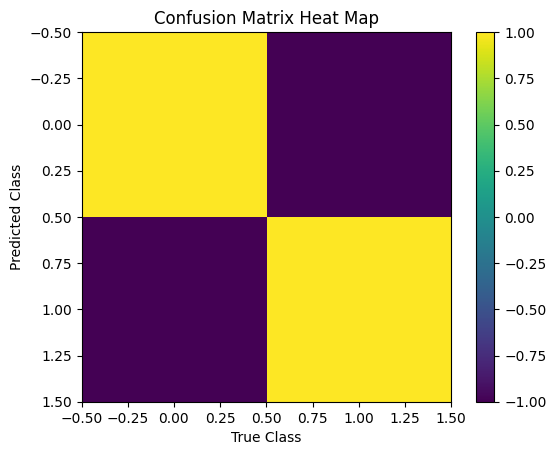

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       246
           1       0.94      0.83      0.88        53

    accuracy                           0.96       299
   macro avg       0.95      0.91      0.93       299
weighted avg       0.96      0.96      0.96       299

specificity: 0.9878048780487805
recall: 0.8301886792452831
precision: 0.9361702127659575
accuracy: 0.959866220735786


In [37]:
#model 1 results
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, precision_score, recall_score

y_test_array = np.ravel(y_test)
network1_pred = model1.predict(x_test)
network1_pred = (network1_pred > 0.5).astype(int)
conf_matrix1 = confusion_matrix(y_true = y_test, y_pred = network1_pred)
conf_matrix_scaler1 = preprocessing.StandardScaler().fit(conf_matrix1)
conf_matrix_scaled1 = conf_matrix_scaler1.transform(conf_matrix1)

# the closer to 1, the more that there is
# the closer to -1 the less that there is
plt.title('Confusion Matrix Heat Map')
plt.imshow(conf_matrix_scaled1)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

network1_report = classification_report(y_true = y_test, y_pred = network1_pred)
print(network1_report)

#this is to double check everything
tn, fp, fn, tp = conf_matrix1.ravel()
specificity = tn / (tn + fp)
print(f"specificity: {specificity}")
recall = tp / (tp + fn)
print(f"recall: {recall}")
precision = tp / (tp + fp)
print(f"precision: {precision}")
accuracy = (tp + tn)/(tp+tn+fn+fp)
print(f"accuracy: {accuracy}")


#note, the low recall is not that huge of a problem, as we are trying to have as high of a precision as possible

## defining the next neural network (2 layers)

In [38]:
#for some reason, I need to define early stopping again each time
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [39]:
layers2 = [
    Flatten(),
    #Add your first layer details here, Example Dense(50, activation="tanh"),
    Dense(50, activation = "relu"),
    Dense(50, activation = "relu"),
    #Add your second layer details here
    Dense(1, activation = "sigmoid")
]

model2 = Sequential(layers2)

model2.compile(optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, batch_size=16, epochs= 100, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8268 - loss: 0.5440 - val_accuracy: 0.8659 - val_loss: 0.3358
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8898 - loss: 0.2790 - val_accuracy: 0.8883 - val_loss: 0.2485
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9330 - loss: 0.1833 - val_accuracy: 0.8939 - val_loss: 0.2263
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9465 - loss: 0.1511 - val_accuracy: 0.9050 - val_loss: 0.2104
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9519 - loss: 0.1340 - val_accuracy: 0.9106 - val_loss: 0.1959
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9507 - loss: 0.1230 - val_accuracy: 0.9106 - val_loss: 0.1845
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9523 - loss: 0.1128 - val_accuracy: 0.9106 - val_loss: 0.1751
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9530 - loss: 0.1043 - val_accuracy: 0.9162 - 

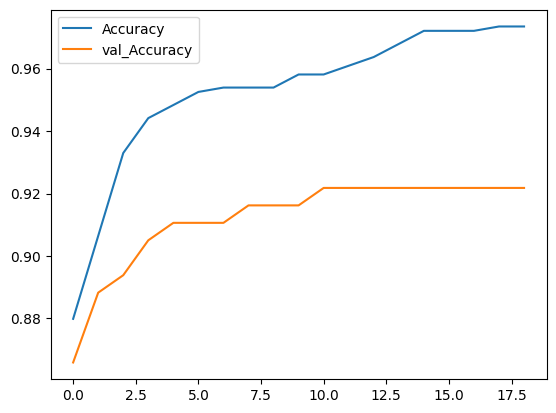

In [40]:
plt.plot(history2.history['accuracy'], label="Accuracy")
plt.plot(history2.history['val_accuracy'], label="val_Accuracy")
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


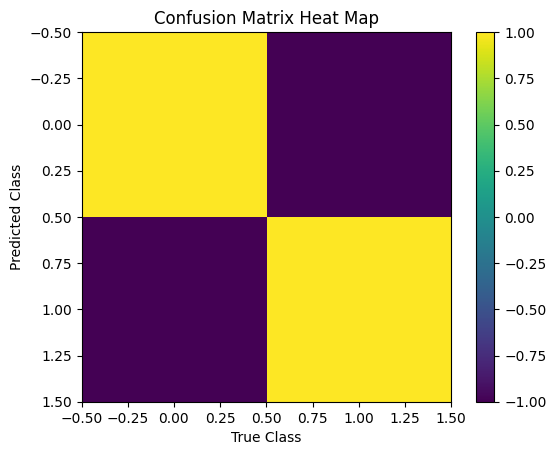

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       246
           1       0.98      0.79      0.88        53

    accuracy                           0.96       299
   macro avg       0.97      0.89      0.93       299
weighted avg       0.96      0.96      0.96       299

specificity: 0.9959349593495935
recall: 0.7924528301886793
precision: 0.9767441860465116
accuracy: 0.959866220735786


In [41]:
#model 2 results
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, precision_score, recall_score

network2_pred = model2.predict(x_test)
network2_pred = (network2_pred > 0.5).astype(int)
conf_matrix2 = confusion_matrix(y_true = y_test, y_pred = network2_pred)
conf_matrix_scaler2 = preprocessing.StandardScaler().fit(conf_matrix2)
conf_matrix_scaled2 = conf_matrix_scaler2.transform(conf_matrix2)

# the closer to 1, the more that there is
# the closer to -1 the less that there is
plt.title('Confusion Matrix Heat Map')
plt.imshow(conf_matrix_scaled2)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

network2_report = classification_report(y_true = y_test, y_pred = network2_pred)
print(network2_report)

#this is to double check everything
tn, fp, fn, tp = conf_matrix2.ravel()
specificity = tn / (tn + fp)
print(f"specificity: {specificity}")
recall = tp / (tp + fn)
print(f"recall: {recall}")
precision = tp / (tp + fp)
print(f"precision: {precision}")
accuracy = (tp + tn)/(tp+tn+fn+fp)
print(f"accuracy: {accuracy}")

## defining the next neural network (5 layers, each are small)

In [42]:
#for some reason, I need to define early stopping again each time
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [43]:
layers3 = [
    Flatten(),
    #Add your first layer details here, Example Dense(50, activation="tanh"),
    Dense(20, activation = "relu"),
    Dense(20, activation = "relu"),
    Dense(20, activation = "relu"),
    Dense(20, activation = "relu"),
    Dense(20, activation = "relu"),

    #Add your second layer details here
    Dense(1, activation = "sigmoid")
]

model3 = Sequential(layers3)

model3.compile(optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])

history3 = model3.fit(x_train, y_train, batch_size=16, epochs= 100, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8204 - loss: 0.6684 - val_accuracy: 0.8045 - val_loss: 0.5232
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8204 - loss: 0.4681 - val_accuracy: 0.8045 - val_loss: 0.3262
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8455 - loss: 0.2987 - val_accuracy: 0.8827 - val_loss: 0.2355
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9320 - loss: 0.2133 - val_accuracy: 0.8827 - val_loss: 0.2318
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9494 - loss: 0.1873 - val_accuracy: 0.8771 - val_loss: 0.2319
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9491 - loss: 0.1731 - val_accuracy: 0.8771 - val_loss: 0.2287
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9533 - loss: 0.1584 - val_accuracy: 0.8883 - val_loss: 0.2214
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9521 - loss: 0.1465 - val_accuracy: 0.8994 - 

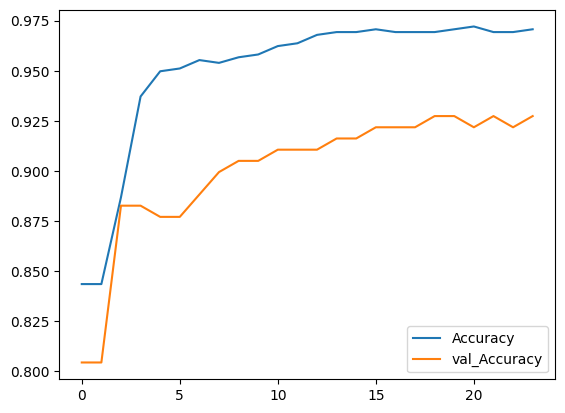

In [44]:
plt.plot(history3.history['accuracy'], label="Accuracy")
plt.plot(history3.history['val_accuracy'], label="val_Accuracy")
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


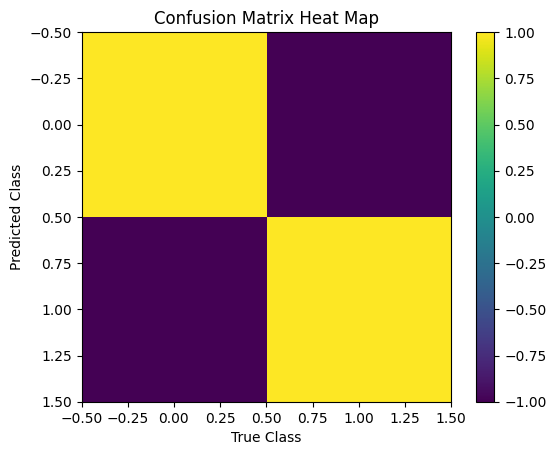

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       246
           1       0.98      0.81      0.89        53

    accuracy                           0.96       299
   macro avg       0.97      0.90      0.93       299
weighted avg       0.96      0.96      0.96       299

specificity: 0.9959349593495935
recall: 0.8113207547169812
precision: 0.9772727272727273
accuracy: 0.9632107023411371


In [45]:
#model 3 results
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, precision_score, recall_score

network3_pred = model3.predict(x_test)
network3_pred = (network3_pred > 0.5).astype(int)
conf_matrix3 = confusion_matrix(y_true = y_test, y_pred = network3_pred)
conf_matrix_scaler3 = preprocessing.StandardScaler().fit(conf_matrix3)
conf_matrix_scaled3 = conf_matrix_scaler3.transform(conf_matrix3)

# the closer to 1, the more that there is
# the closer to -1 the less that there is
plt.title('Confusion Matrix Heat Map')
plt.imshow(conf_matrix_scaled3)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

network3_report = classification_report(y_true = y_test, y_pred = network3_pred)
print(network3_report)

#this is to double check everything
tn, fp, fn, tp = conf_matrix3.ravel()
specificity = tn / (tn + fp)
print(f"specificity: {specificity}")
recall = tp / (tp + fn)
print(f"recall: {recall}")
precision = tp / (tp + fp)
print(f"precision: {precision}")
accuracy = (tp + tn)/(tp+tn+fn+fp)
print(f"accuracy: {accuracy}")

## exploratory model with 10 hidden layers (more than the number of features)

In [46]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

layers4 = [
    Flatten(),
    #Add your first layer details here, Example Dense(50, activation="tanh"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    #Add your second layer details here
    Dense(1, activation = "sigmoid")
]

model4 = Sequential(layers4)

model4.compile(optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])

history4 = model4.fit(x_train, y_train, batch_size=16, epochs= 100, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.7337 - loss: 0.6719 - val_accuracy: 0.8045 - val_loss: 0.5940
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8204 - loss: 0.5436 - val_accuracy: 0.8045 - val_loss: 0.4992
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8204 - loss: 0.4626 - val_accuracy: 0.8045 - val_loss: 0.4280
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8204 - loss: 0.3872 - val_accuracy: 0.8045 - val_loss: 0.3724
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8204 - loss: 0.3244 - val_accuracy: 0.8045 - val_loss: 0.3226
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8204 - loss: 0.2721 - val_accuracy: 0.8045 - val_loss: 0.3023
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8204 - loss: 0.2484 - val_accuracy: 0.8492 - val_loss: 0.2871
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9196 - loss: 0.2313 - val_accuracy: 0.8883 

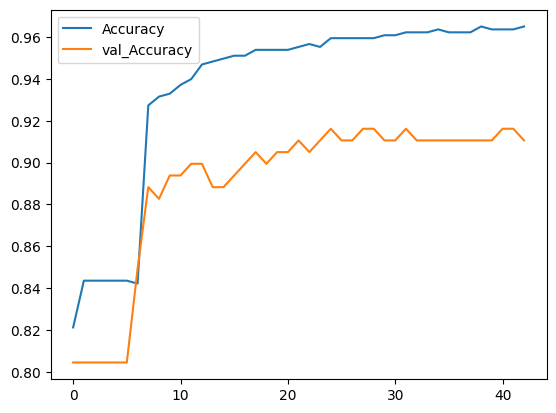

In [47]:
plt.plot(history4.history['accuracy'], label="Accuracy")
plt.plot(history4.history['val_accuracy'], label="val_Accuracy")
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


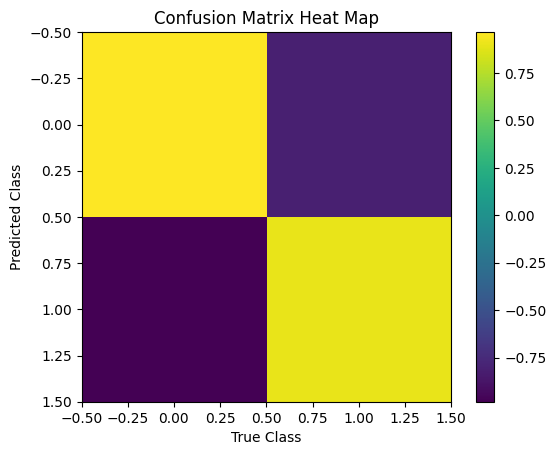

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       246
           1       0.89      0.77      0.83        53

    accuracy                           0.94       299
   macro avg       0.92      0.88      0.90       299
weighted avg       0.94      0.94      0.94       299

specificity: 0.9796747967479674
recall: 0.7735849056603774
precision: 0.8913043478260869
accuracy: 0.9431438127090301


In [48]:
#model 4 results
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, precision_score, recall_score

network4_pred = model4.predict(x_test)
network4_pred = (network4_pred > 0.5).astype(int)
conf_matrix4 = confusion_matrix(y_true = y_test, y_pred = network4_pred)
conf_matrix_scaler4 = preprocessing.StandardScaler().fit(conf_matrix4)
conf_matrix_scaled4 = conf_matrix_scaler3.transform(conf_matrix4)

# the closer to 1, the more that there is
# the closer to -1 the less that there is
plt.title('Confusion Matrix Heat Map')
plt.imshow(conf_matrix_scaled4)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

network4_report = classification_report(y_true = y_test, y_pred = network4_pred)
print(network4_report)

#this is to double check everything
tn, fp, fn, tp = conf_matrix4.ravel()
specificity = tn / (tn + fp)
print(f"specificity: {specificity}")
recall = tp / (tp + fn)
print(f"recall: {recall}")
precision = tp / (tp + fp)
print(f"precision: {precision}")
accuracy = (tp + tn)/(tp+tn+fn+fp)
print(f"accuracy: {accuracy}")